In [1]:
from utils import train_resnet as tr
from torch.utils.data import DataLoader, ConcatDataset
from torch.utils.data import random_split
import torch
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loaders, datasets, info = tr.get_data_loaders('breastmnist', return_datasets=True)

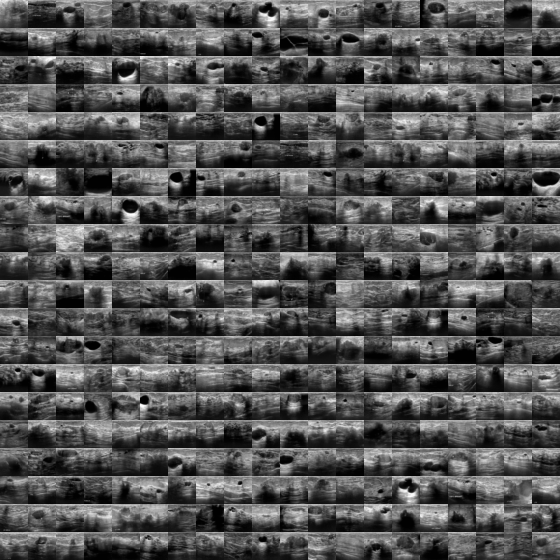

In [3]:
datasets[0].montage(length=20)

In [4]:
# Combine train_dataset and val_dataset
combined_train_dataset = ConcatDataset([datasets[0], datasets[1]])

# Set the random seed for reproducibility
torch.manual_seed(42)

# Calculate the sizes for training and calibration datasets
train_size = int(0.8 * len(combined_train_dataset))
calibration_size = len(combined_train_dataset) - train_size

# Split the combined_train_dataset into training and calibration datasets
train_dataset, calibration_dataset = random_split(combined_train_dataset, [train_size, calibration_size])

# Create DataLoaders for the new training and calibration datasets
calibration_loader = DataLoader(dataset=calibration_dataset, batch_size=128, shuffle=False)

print(f'Training dataset size: {len(train_dataset)}')
print(f'Calibration dataset size: {len(calibration_dataset)}')

Training dataset size: 499
Calibration dataset size: 125


In [5]:
# Create stratified K-fold cross-validator
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Get the labels for stratification
labels = [label for _, label in train_dataset]

# Create a list to store the new dataloaders
train_loaders = []
val_loaders = []

for train_index, val_index in skf.split(np.zeros(len(labels)), labels):
    train_subset = torch.utils.data.Subset(train_dataset, train_index)
    val_subset = torch.utils.data.Subset(train_dataset, val_index)
    
    train_loader = DataLoader(dataset=train_subset, shuffle=True, drop_last=True, batch_size=32)
    val_loader = DataLoader(dataset=val_subset, shuffle=True, drop_last=True, batch_size=32)
    
    train_loaders.append(train_loader)
    val_loaders.append(val_loader)

MODEL 0
Train Epoch: 0 [0/399 (0%)]	Loss: 0.678251
Train Epoch: 0 [320/399 (83%)]	Loss: 0.553889

Validation set: Average loss: 0.6433, Accuracy: 62/100 (62%)

Train Epoch: 1 [0/399 (0%)]	Loss: 0.487709
Train Epoch: 1 [320/399 (83%)]	Loss: 0.384770

Validation set: Average loss: 0.6105, Accuracy: 70/100 (70%)

Train Epoch: 2 [0/399 (0%)]	Loss: 0.207840
Train Epoch: 2 [320/399 (83%)]	Loss: 0.189360

Validation set: Average loss: 0.6642, Accuracy: 68/100 (68%)

Train Epoch: 3 [0/399 (0%)]	Loss: 0.122668
Train Epoch: 3 [320/399 (83%)]	Loss: 0.091743

Validation set: Average loss: 0.6730, Accuracy: 69/100 (69%)

Train Epoch: 4 [0/399 (0%)]	Loss: 0.108943
Train Epoch: 4 [320/399 (83%)]	Loss: 0.042293

Validation set: Average loss: 0.6253, Accuracy: 73/100 (73%)

Train Epoch: 5 [0/399 (0%)]	Loss: 0.050503
Train Epoch: 5 [320/399 (83%)]	Loss: 0.068383

Validation set: Average loss: 0.6159, Accuracy: 77/100 (77%)



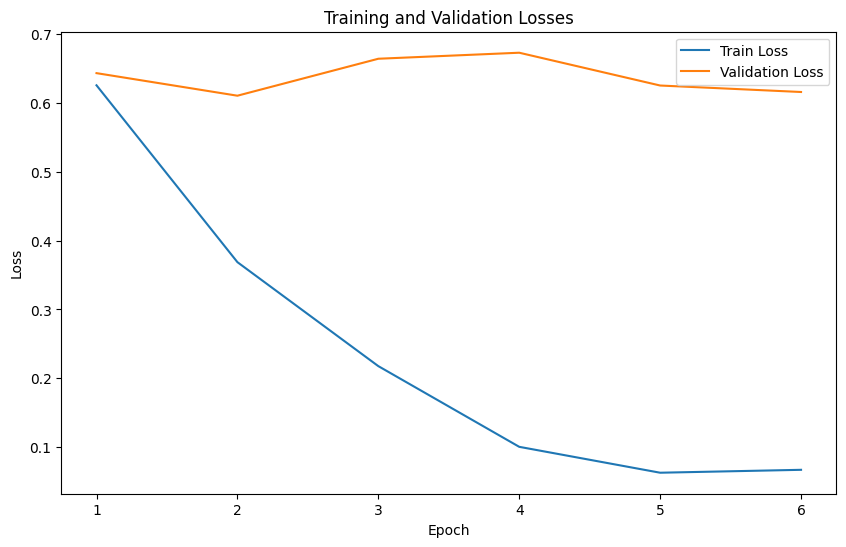

Accuracy: 0.878
Balanced Accuracy: 0.841
AUC: 0.882


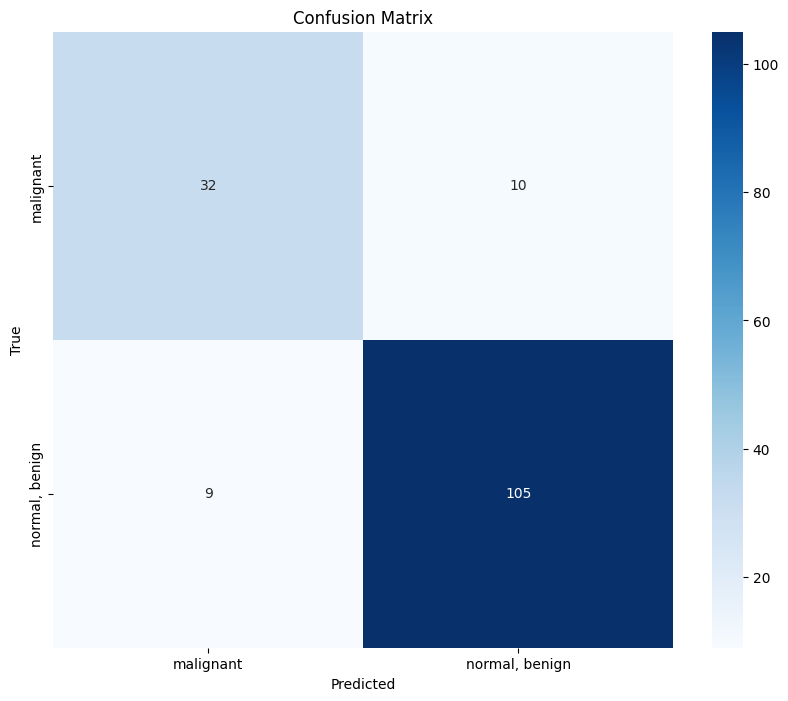

MODEL 1
Train Epoch: 0 [0/399 (0%)]	Loss: 0.742600
Train Epoch: 0 [320/399 (83%)]	Loss: 0.567667

Validation set: Average loss: 0.6291, Accuracy: 64/100 (64%)

Train Epoch: 1 [0/399 (0%)]	Loss: 0.410189
Train Epoch: 1 [320/399 (83%)]	Loss: 0.360333

Validation set: Average loss: 0.5715, Accuracy: 70/100 (70%)

Train Epoch: 2 [0/399 (0%)]	Loss: 0.261174
Train Epoch: 2 [320/399 (83%)]	Loss: 0.257138

Validation set: Average loss: 0.6362, Accuracy: 67/100 (67%)

Train Epoch: 3 [0/399 (0%)]	Loss: 0.216005
Train Epoch: 3 [320/399 (83%)]	Loss: 0.103556

Validation set: Average loss: 0.6971, Accuracy: 67/100 (67%)

Train Epoch: 4 [0/399 (0%)]	Loss: 0.080011
Train Epoch: 4 [320/399 (83%)]	Loss: 0.047698

Validation set: Average loss: 0.6294, Accuracy: 68/100 (68%)

Train Epoch: 5 [0/399 (0%)]	Loss: 0.042576
Train Epoch: 5 [320/399 (83%)]	Loss: 0.079380

Validation set: Average loss: 0.7071, Accuracy: 70/100 (70%)



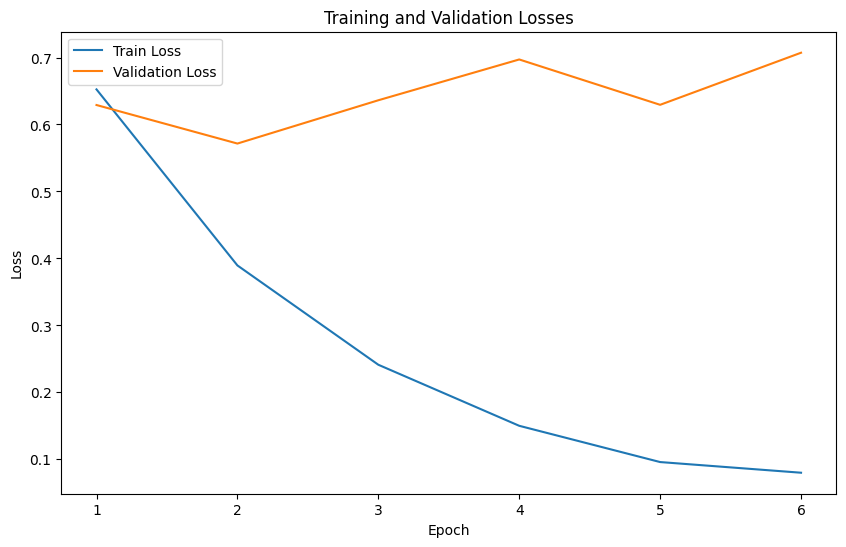

Accuracy: 0.833
Balanced Accuracy: 0.766
AUC: 0.819


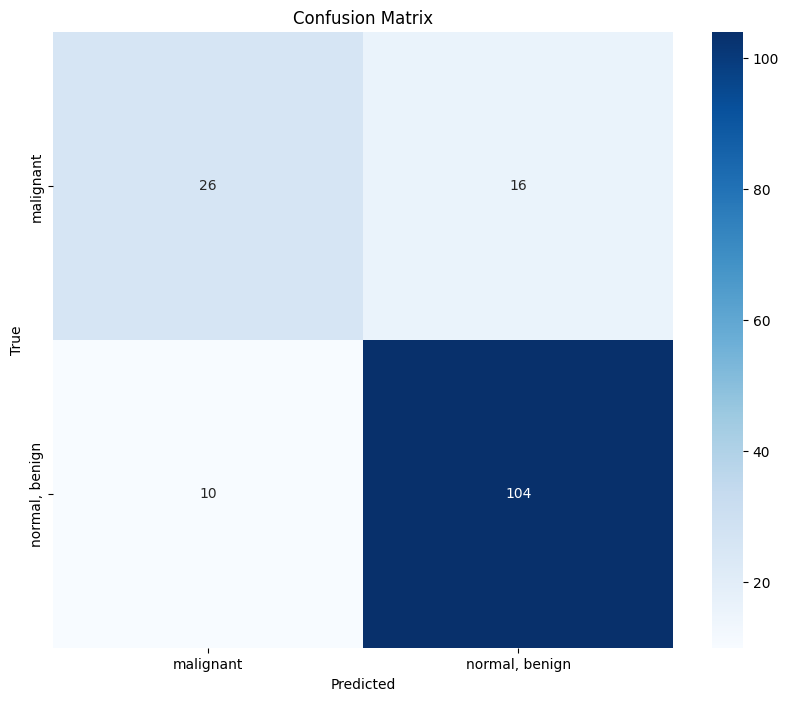

MODEL 2
Train Epoch: 0 [0/399 (0%)]	Loss: 0.702164
Train Epoch: 0 [320/399 (83%)]	Loss: 0.575007

Validation set: Average loss: 0.6136, Accuracy: 69/100 (69%)

Train Epoch: 1 [0/399 (0%)]	Loss: 0.366987
Train Epoch: 1 [320/399 (83%)]	Loss: 0.382755

Validation set: Average loss: 0.5567, Accuracy: 70/100 (70%)

Train Epoch: 2 [0/399 (0%)]	Loss: 0.305889
Train Epoch: 2 [320/399 (83%)]	Loss: 0.234821

Validation set: Average loss: 0.5155, Accuracy: 73/100 (73%)

Train Epoch: 3 [0/399 (0%)]	Loss: 0.103843
Train Epoch: 3 [320/399 (83%)]	Loss: 0.057170

Validation set: Average loss: 0.5693, Accuracy: 73/100 (73%)

Train Epoch: 4 [0/399 (0%)]	Loss: 0.135967
Train Epoch: 4 [320/399 (83%)]	Loss: 0.055160

Validation set: Average loss: 0.5686, Accuracy: 69/100 (69%)

Train Epoch: 5 [0/399 (0%)]	Loss: 0.100735
Train Epoch: 5 [320/399 (83%)]	Loss: 0.032019

Validation set: Average loss: 0.7145, Accuracy: 70/100 (70%)



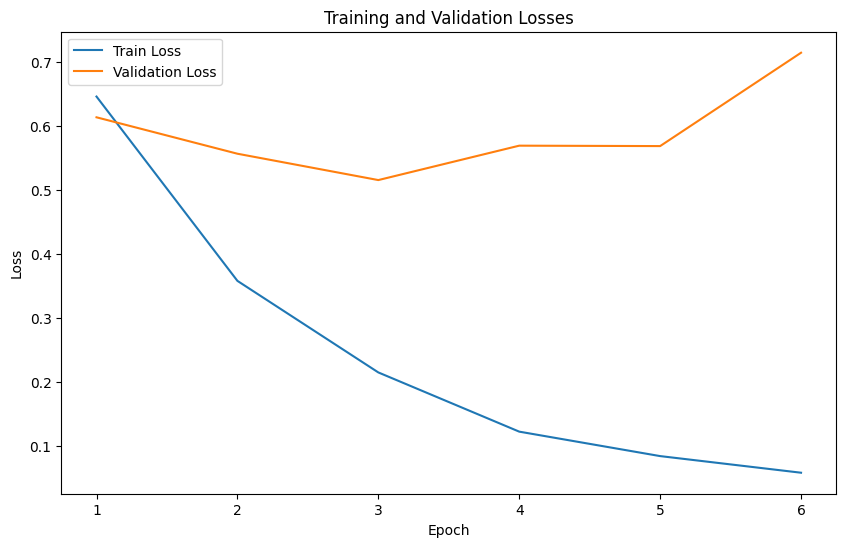

Accuracy: 0.821
Balanced Accuracy: 0.779
AUC: 0.848


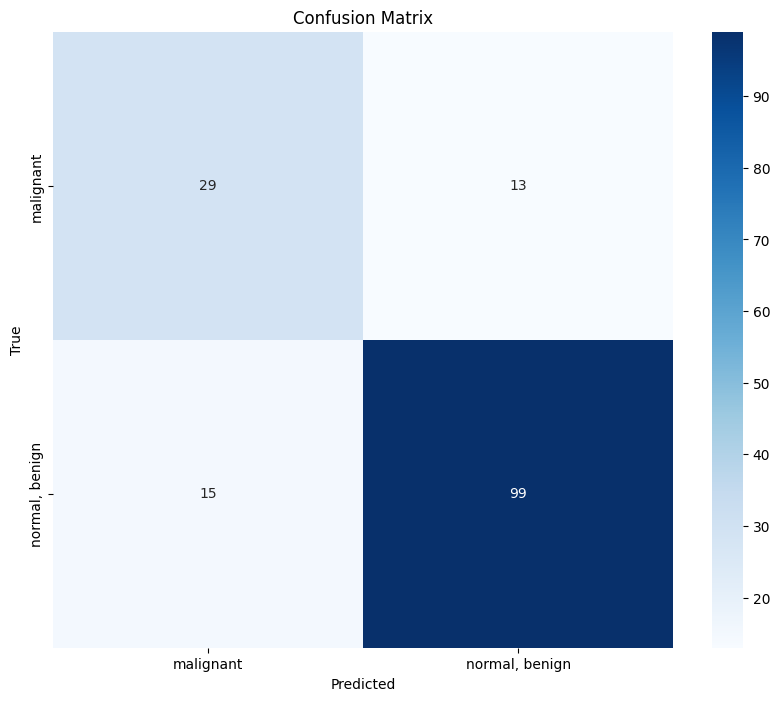

MODEL 3
Train Epoch: 0 [0/399 (0%)]	Loss: 0.730807
Train Epoch: 0 [320/399 (83%)]	Loss: 0.579534

Validation set: Average loss: 0.6190, Accuracy: 72/100 (72%)

Train Epoch: 1 [0/399 (0%)]	Loss: 0.450902
Train Epoch: 1 [320/399 (83%)]	Loss: 0.372859

Validation set: Average loss: 0.5023, Accuracy: 74/100 (74%)

Train Epoch: 2 [0/399 (0%)]	Loss: 0.312454
Train Epoch: 2 [320/399 (83%)]	Loss: 0.219969

Validation set: Average loss: 0.4076, Accuracy: 83/100 (83%)

Train Epoch: 3 [0/399 (0%)]	Loss: 0.122708
Train Epoch: 3 [320/399 (83%)]	Loss: 0.160951

Validation set: Average loss: 0.3988, Accuracy: 77/100 (77%)

Train Epoch: 4 [0/399 (0%)]	Loss: 0.062478
Train Epoch: 4 [320/399 (83%)]	Loss: 0.063193

Validation set: Average loss: 0.3688, Accuracy: 80/100 (80%)

Train Epoch: 5 [0/399 (0%)]	Loss: 0.063146
Train Epoch: 5 [320/399 (83%)]	Loss: 0.036187

Validation set: Average loss: 0.3782, Accuracy: 82/100 (82%)



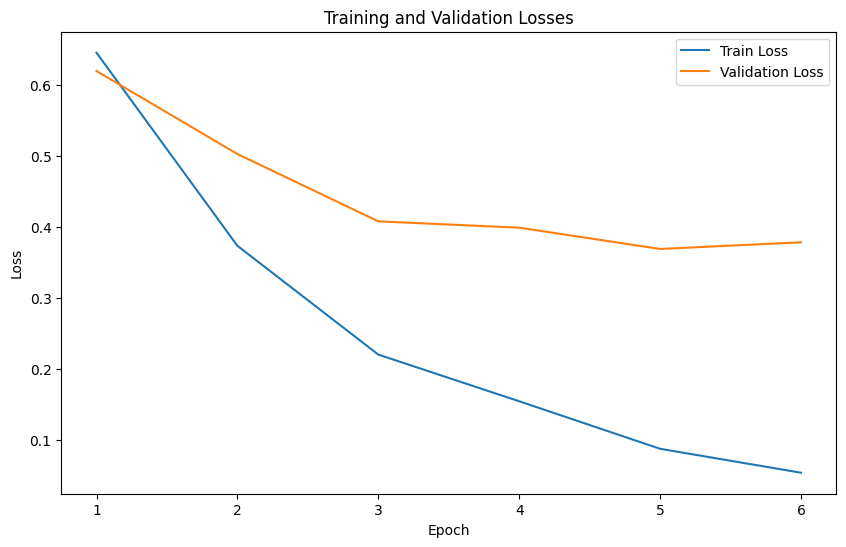

Accuracy: 0.910
Balanced Accuracy: 0.916
AUC: 0.941


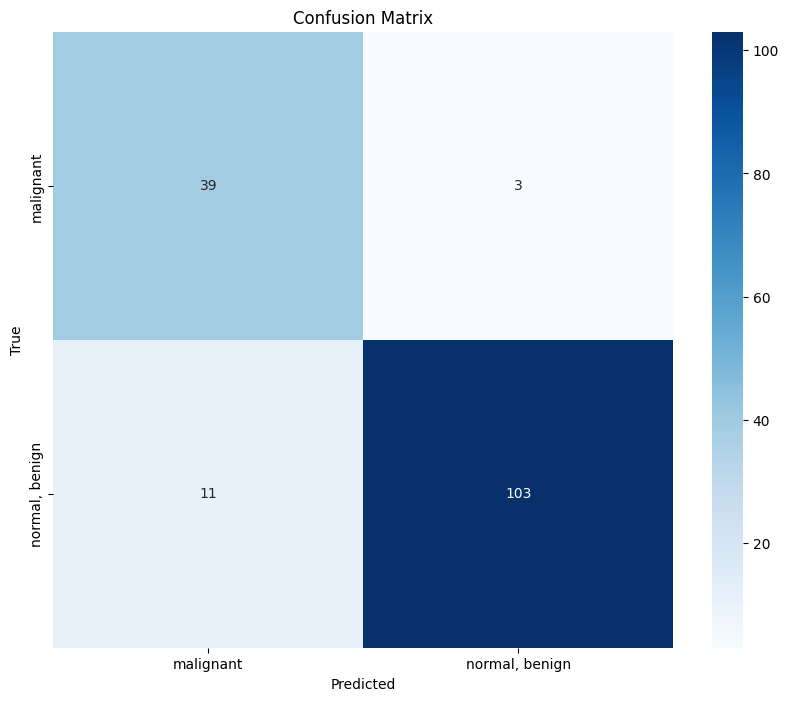

MODEL 4
Train Epoch: 0 [0/400 (0%)]	Loss: 0.775060
Train Epoch: 0 [320/400 (83%)]	Loss: 0.573242

Validation set: Average loss: 0.5926, Accuracy: 78/99 (79%)

Train Epoch: 1 [0/400 (0%)]	Loss: 0.450400
Train Epoch: 1 [320/400 (83%)]	Loss: 0.413503

Validation set: Average loss: 0.5475, Accuracy: 75/99 (76%)

Train Epoch: 2 [0/400 (0%)]	Loss: 0.257646
Train Epoch: 2 [320/400 (83%)]	Loss: 0.186417

Validation set: Average loss: 0.4572, Accuracy: 77/99 (78%)

Train Epoch: 3 [0/400 (0%)]	Loss: 0.159267
Train Epoch: 3 [320/400 (83%)]	Loss: 0.121120

Validation set: Average loss: 0.4334, Accuracy: 79/99 (80%)

Train Epoch: 4 [0/400 (0%)]	Loss: 0.122737
Train Epoch: 4 [320/400 (83%)]	Loss: 0.077530

Validation set: Average loss: 0.4306, Accuracy: 78/99 (79%)

Train Epoch: 5 [0/400 (0%)]	Loss: 0.061778
Train Epoch: 5 [320/400 (83%)]	Loss: 0.038039

Validation set: Average loss: 0.4273, Accuracy: 81/99 (82%)



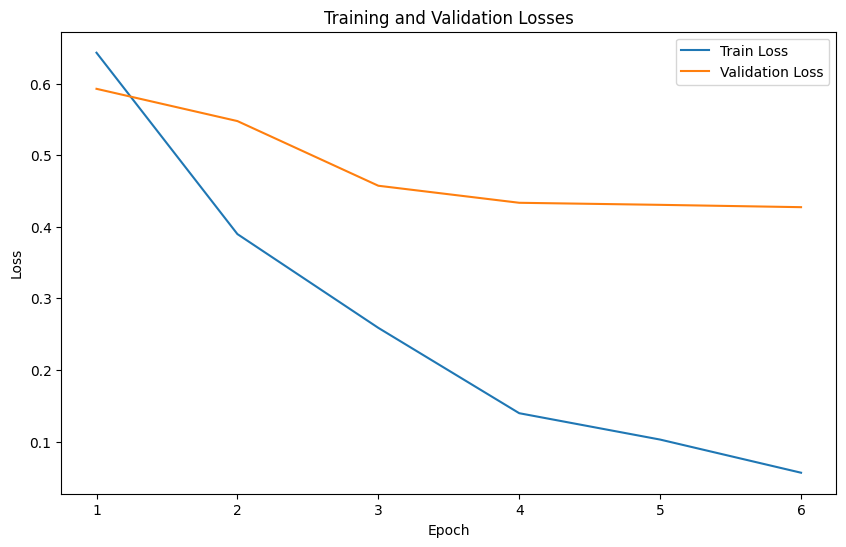

Accuracy: 0.872
Balanced Accuracy: 0.845
AUC: 0.884


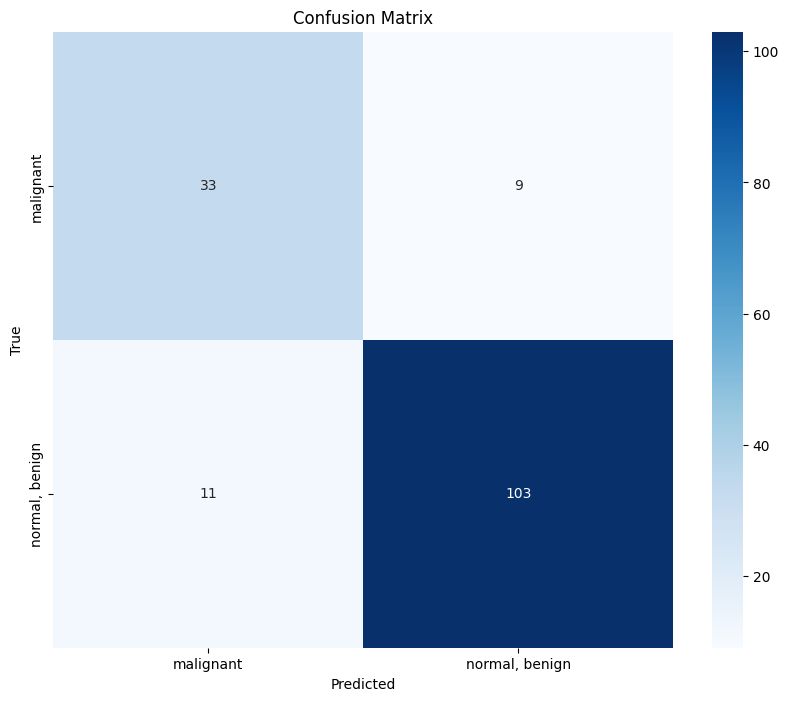

In [6]:
models = []
for i in range(5):
    print('MODEL ' + str(i))
    model = tr.train_resnet18(
        'breastmnist',
        train_loader=train_loaders[i],
        val_loader=val_loaders[i],
        num_epochs=6,    
        learning_rate=0.0001,
        random_seed=42  # Set a fixed seed for reproducibility
    )
    models.append(model)

Accuracy: 0.917
Balanced Accuracy: 0.898
AUC: 0.929


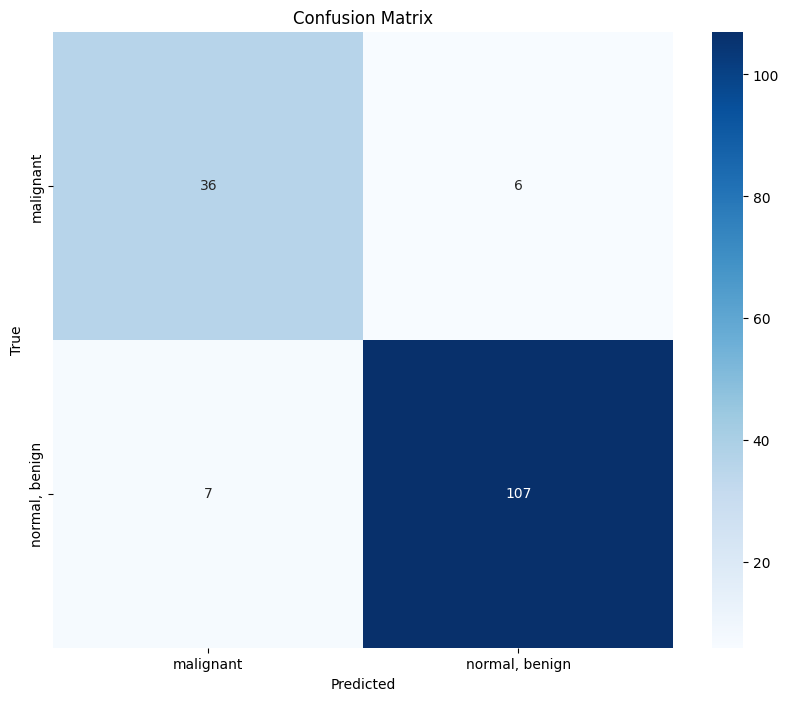

In [8]:
tr.evaluate_model(model=models, test_loader=loaders[2], data_flag='breastmnist')